In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from ipywidgets import interact
from sklearn.model_selection import GridSearchCV

load and read the data

In [2]:
data="imports-85.data"
df = pd.read_csv(data,header = None)

Add the header for each column

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
           "engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders",
           "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg",
           "price"]
df.columns = headers

Drop/ Remove rows that contains missing values like NaN

In [4]:
df.dropna(subset = ["price"], axis=0, inplace=True)
df.dropna(subset = ["peak-rpm"], axis=0, inplace=True)

Convert datatype from object to float

In [5]:
vals_price = pd.to_numeric(df["price"],errors='coerce')
df["price"] = vals_price.fillna(vals_price.mean())

vals_peakRpm = pd.to_numeric(df["peak-rpm"],errors='coerce')
df["peak-rpm"] = vals_peakRpm.fillna(vals_peakRpm.mean())

vals_hp = pd.to_numeric(df["horsepower"],errors='coerce')
df["horsepower"] = vals_hp.fillna(vals_hp.mean())

vals = pd.to_numeric(df["normalized-losses"],errors='coerce')
df["normalized-losses"] = vals.fillna(vals.mean())

Convert mpg to L/100kms and rename the column

In [6]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city_mpg": "city-L/100km"}, inplace=True)

In [ ]:
df["length"] = (df["length"]-df["length"].mean())/df["length"].std()
df["width"] = (df["width"]-df["width"].mean())/df["width"].std()
df["height"] = (df["height"]-df["height"].mean())/df["height"].std()

In [ ]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
group_names = ["Low", "Medium","High"]
df["price-binned"] = pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

summarize the categorical data using value_counts()

In [7]:
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
print(drive_wheels_counts)

drive-wheels
fwd    120
rwd     76
4wd      9
dtype: int64


boxplot example

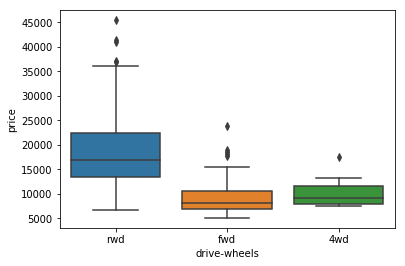

In [8]:
sns.boxplot(x="drive-wheels",y="price",data=df)

Each observation in a scatter plot is represented as a point. This plot shows the relationship between two variables:
The predictor variable: is the variable that you are using to predict an outcome. In this
case, our predictor variable is the engine size.
The target variable: is the variable that you are trying to predict. In this case, our
target variable is the price, since this would be the outcome.
In this case, we will thus plot the engine size on the x-axis and the price on the y-axis.
We are using the Matplotlib function “scatter” here, taking in x and a y variable.

Text(0, 0.5, 'Price')

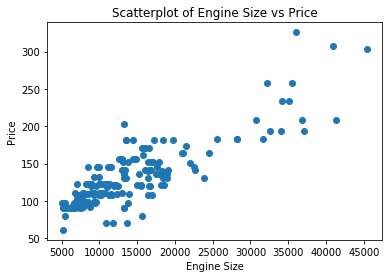

In [9]:
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

By using groupby to find the average price of vehicles and
observe how they differ between different types of “body styles” and “drive wheels”
variables.
To do this, we first pick out the three data columns we are interested in, which is done
in the first line of code.
We then group the reduced data according to ‘drive wheels’ and ‘body style’ in
the second line.
Since we are interested in knowing how the average price differs across the board, we
can take the mean of each group and append this bit at the very end of line 2. 
We can see that, according to our data, rear wheel drive convertibles and rear wheel drive hardtops have the highest value, while four wheel drive hatchbacks have the lowest value.

In [10]:
df_test = df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


We can transform the above table to a pivot table by using the pivot
method.
In the previous table, both ‘drive wheels’ and ‘body style’ were listed in columns.
A pivot table has one variable displayed along the columns and the other variable displayed
along the rows.
Just with one line of code and by using the pandas pivot method, we can pivot the “body
style” variable so it is displayed along the columns and the “drive wheels” will
be displayed along the rows.
The price data now becomes a rectangular grid, which is easier to visualize.

In [11]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Heat map takes a rectangular grid of data and assigns a color intensity based on the
data value at the grid points.
It is a great way to plot the target variable over multiple variables and through this get
visual clues of the relationship between these variables and the target.

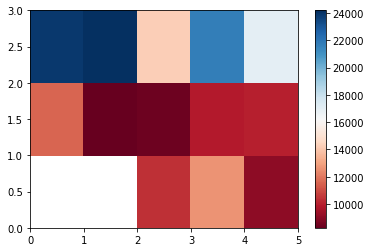

In [12]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Analysis of Variance (ANOVA)
In the first line we extract the make and price data.
Then, we'll group the data by different makes.
The ANOVA test can be performed in Python using the f_oneway method as the built-in
function of the Scipy package.
We pass in the price data of the two car make groups that we want to compare and it calculates
the ANOVA results.
The prices between Hondas and Subarus are not significantly different, as the F-test
score is less than 1 and p-value is larger than 0.05.
We can do the same for Honda and Jaguar.
The prices between Hondas and Jaguars are significantly different, since the F-score
is very large (F = 401) and the p-value is larger than 0.05.
All in all, we can say that there is a strong correlation between a categorical variable
and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

In [13]:
df_anova = df[["make", "price"]]
grouped_anova = df_anova.groupby(["make"])
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_2 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
print(anova_results_1)
print(anova_results_2)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


Regression Plot provides good estimate of:

1. The relationship betweeen two variables.
2. The strength of the correlation
3. The direction of the relationship (positive or negative)

Let's look at the correlation between engine size and price. This time we'll visualize these two variables using
a scatter plot and an added linear line called a regression line, which indicates the relationship between the two.
The main goal of this plot is to see whether the engine size has any impact on the price.
In this example, you can see that the straight line through the data points is very
steep which shows that there's a positive linear relationship between the two variables.
With increase in values of engine size, values of price go up as well and the slope of the line is positive. So there is a positive correlation between engine size and price.

C:\Users\Pushkar Jaywant\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 54686.27104310998)

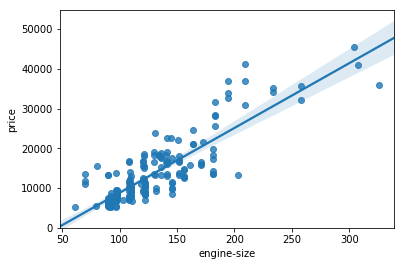

In [14]:
sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

As another example, now let's look at the relationship between highway miles per gallon to see its impact on the car price. As we can see in this plot, when highway miles per gallon value goes up the value price goes down. Therefore there is a negative linear relationship between highway miles per gallon and price. Although this relationship is negative the slope of the line is steep which means that the highway miles per gallon is still a good predictor of price. These two variables are said to have a negative correlation.

(0, 48240.6266599044)

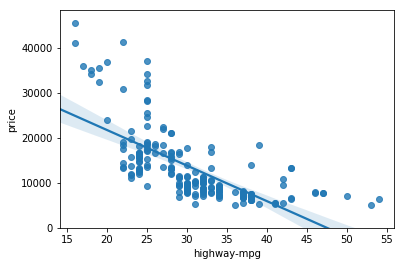

In [15]:
sns.regplot(x="highway-mpg", y="price", data = df)
plt.ylim(0,)

Finally, we have an example of a weak correlation. For example, both low peak RPM and high values of peak RPM have low and high prices. Therefore, we cannot use RPM to predict the values.

(0, 47436.148325769056)

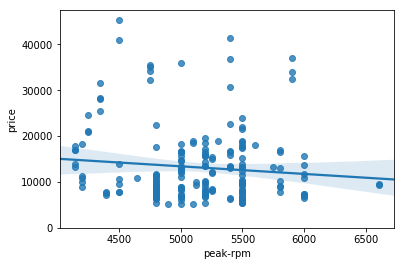

In [16]:
sns.regplot(x="peak-rpm", y="price", data = df)
plt.ylim(0,)

We use the “residplot” function. The first parameter is a series of dependent variable or feature. The second parameter is a Series of dependent variable or target. We see in this case the Residuals have a curvature.

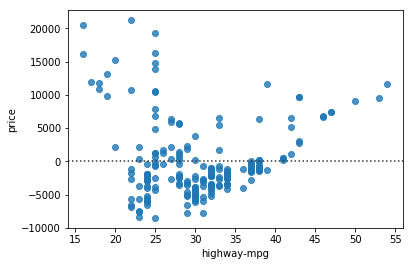

In [17]:
sns.residplot(df['highway-mpg'], df['price'])

Pearson correlation method will gives two values: the correlation coefficient and the P-value.For the correlation coefficient,
a value close to 1 implies a large positive correlation, while a value close to negative 1 implies a large negative correlation, and a value close to zero implies no correlation between the variables. Next, the P-value will tell us how
certain we are about the correlation that we calculated. For the P-value, a value less than .001 gives us a strong certainty about the correlation coefficient that we calculated. A value between.001 and.05 gives us moderate certainty. A value between.05 and.1 will give us a weak certainty. And a P-value larger than.1 will give us no certainty of correlation at all.
We can say that there is a strong correlation when the correlation coefficient is close to 1 or negative 1, and the P-value is less than.001. The following plot shows data with different correlation values. In this example, we want to look at the correlation between the variable's horsepower and car price. We can see that the correlation coefficient is approximately.8, and this is close to 1. So there is a strong positive correlation. We can also see that the P-value is very small, much smaller than.001. And so we can conclude that we are certain about the strong positive correlation. Taking all variables into account,
we can now create a heatmap that indicates the correlation between each of the variables with one another. The color scheme indicates the Pearson correlation coefficient, indicating the strength of the correlation between two variables. We can see a diagonal line with a dark red color, indicating that all the values on this diagonal are highly correlated. This makes sense because when you look closer, the values on the diagonal are the correlation of all variables with themselves, which will be always 1. This correlation heatmap gives us a good overview of how the different variables are related to one another and,
most importantly, how these variables are related to price.


In [18]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print(pearson_coef)
print(p_value)

0.7579169537498177
1.607670397812937e-39


Create a Linear Regression Object using the constructor

In [19]:
lm = LinearRegression()

Define the predictor variable and the target variable

In [20]:
X = df['highway-mpg']
Y = df['price']
X1 = df['highway-mpg']
Y1 = df['price']
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

Use lm.fit(X,Y) to fit the model, i.e. fine the parameters b0 and b1

In [21]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Yhat = lm.predict(X)

Intercept b0 of a linear regression

In [23]:
lm.intercept_

array([37470.66014138])

Slope b1 of a linear regression

In [24]:
lm.coef_

array([[-789.02661986]])

A distribution plot counts the predicted value versus the actual value. These plots are extremely useful for visualizing models with more than one independent variable or feature. We examine the vertical axis.
- We then count and plot the number of predicted points that are approximately equal to one.
- We then count and plot the number of predicted points that are approximately equal to two.
- We repeat the process for predicted points that are approximately equal to three.
Then we repeat the process for the target values.
In this case, all the target values are approximately equal to two. The values of the targets and predicted values are continuous. A histogram is for discrete values. Therefore pandas will convert them to a distribution.
The vertical access is scaled to make the area under the distribution equal to one.
This is an example of using a distribution plot.
The dependent variable or feature is price.
The fitted values that result from the model are in blue.
The actual values are in red.
We see the predicted values for prices in the range from $40 000 to $50 000 are inaccurate.
The prices in the region form $10 000 to $20 000 are much closer to the target value.

C:\Users\Pushkar Jaywant\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


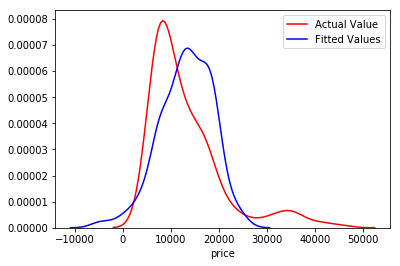

In [25]:
ax1 = sns.distplot(df['price'], hist=False, color = "r", label="Actual Value")
sns.distplot(Yhat, hist=False, color = "b", label = "Fitted Values", ax= ax1)

Calculating the R-squared value by using the score() method, in the linear regression object. From the value that we get from the below example, we can say that approximately 47.68% of the variation of the price is explained by this simple linear model. The R-square value is usually between 0 and 1, if the value is a negative number then it can be due to overfitting.

In [26]:
X2 = df['highway-mpg'].values.reshape(-1,1)
Y2 = df['price'].values.reshape(-1,1)
linReg = LinearRegression()
linReg.fit(X2, Y2)
linReg.score(X2, Y2,sample_weight=None)

0.47682578947968446

Now we want to find out what the price would be for a car that has a highway-mpg of 30. Plugging this value into the predict() method, gives us a resulting price of $13,799.86. This seems to make sense, for example, the value is not negative, extremely high or extremely low.

In [27]:
X3 = df['highway-mpg'].values.reshape(-1,1)
Y3 = df['price'].values.reshape(-1,1)
linReg = LinearRegression()
linReg.fit(X3, Y3)
linReg.predict([[30]])

array([[13799.86154571]])

<h2>Model Evaluation</h2>

A popular function in the sci-kit learn package for splitting datasets is the "train test split" function. This function randomly splits a dataset into training and testing subsets. The output is an array: 
 * "x_train" and "y_train", the subsets for training.
 * "x_test" and "y_test",the subsets for testing. 
<br>In this case, the "test size" percentage of the data for the testing set. Here it is 15%. The random state is a random seed for random dataset splitting.

<h3>Functions for plotting</h3>

In [28]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [29]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [30]:
y_data = df['price']
x_data = df.drop('price', axis=1)

Split data into training and testing data using the function train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 174


We create a Linear Regression object:

In [32]:
lre = LinearRegression()

we fit the model using the feature horsepower

In [33]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data:

In [34]:
lre.score(x_train[['horsepower']], y_train)

0.5709739601049417

Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's go over several methods that you can use for Cross-validation. <br> We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4.

In [35]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average R^2 value in the fold:

In [36]:
Rcross

array([0.68657103, 0.49761541, 0.28225511, 0.2906428 ])

We can calculate the average and standard deviation of our estimate:

In [37]:
print("The mean of the folds are", Rcross.mean(), " and the standard deviation is", Rcross.std())

The mean of the folds are 0.43927108405129345  and the standard deviation is 0.1668125499301127


'cross_val_predict' function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. <br> We input the object, the feature in this case 'horsepower' , the target data y_data. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [38]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([13796.96776433, 13796.96776433, 19495.75800823, 12604.19771328,
       14327.08778702])

<h3>Overfitting, Underfitting and Model Selection</h3>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [39]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction using training data:

In [40]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([12430.08939716, 26825.15185621, 13753.28393167, 17816.0488674 ,
        6453.03078531])

Prediction using test data:

In [41]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6205.32211135,  6982.47443833,  6245.22654098,  4989.11981301,
       10214.57155833])

Performing some model evaluation using our training and testing data separately.

C:\Users\Pushkar Jaywant\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


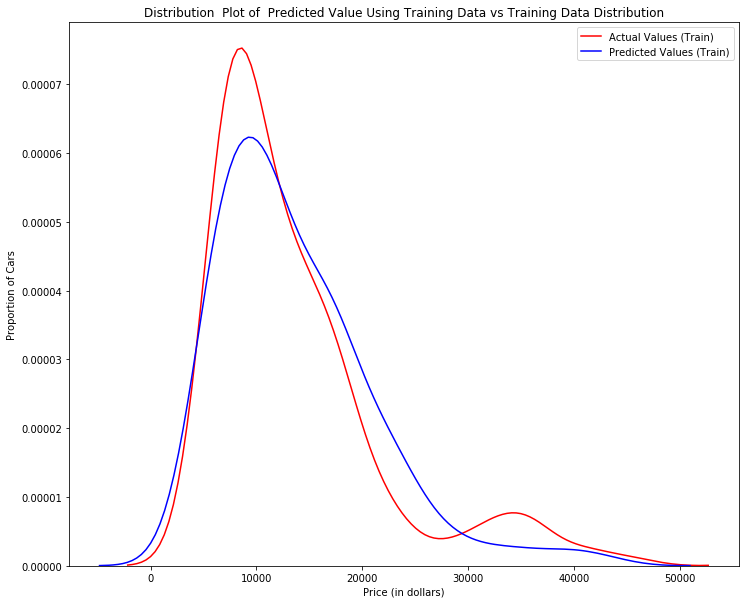

In [42]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

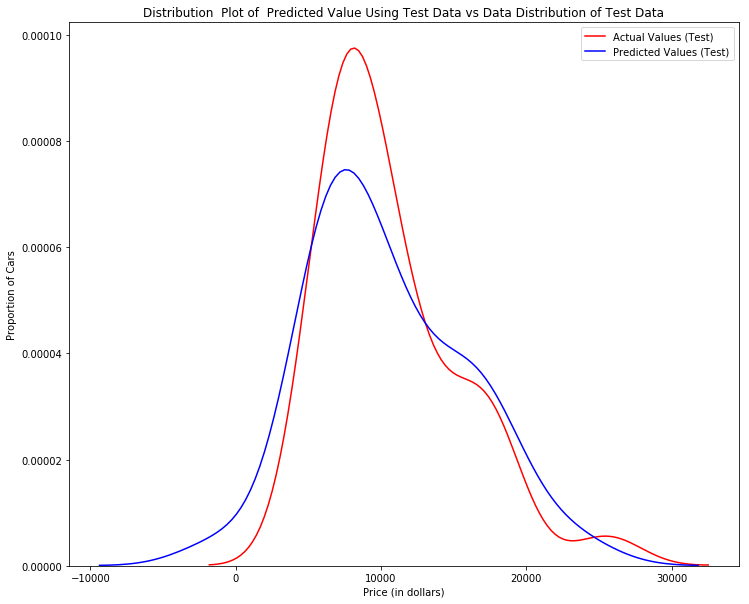

In [43]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different.<br> Let's perform polynomial regression to check whether it exhibits a drop in the prediction accuracy when analysing the test dataset.

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

Let's use 55 percent of the data for testing and the rest for training:

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'horse power'.

In [45]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

Now let's create a linear regression model "poly" and train it.

In [46]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can see the output of our model using the method "predict." then assign the values to "yhat".

In [47]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7043.64040422, 21493.86729326, 14438.62910261,  8401.12216262,
       12610.39932943])

Let's take the first five predicted values and compare it to the actual targets.

In [48]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7043.64040422 21493.86729326 14438.62910261  8401.12216262]
True values: [ 6795. 15750. 15250.  5151.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

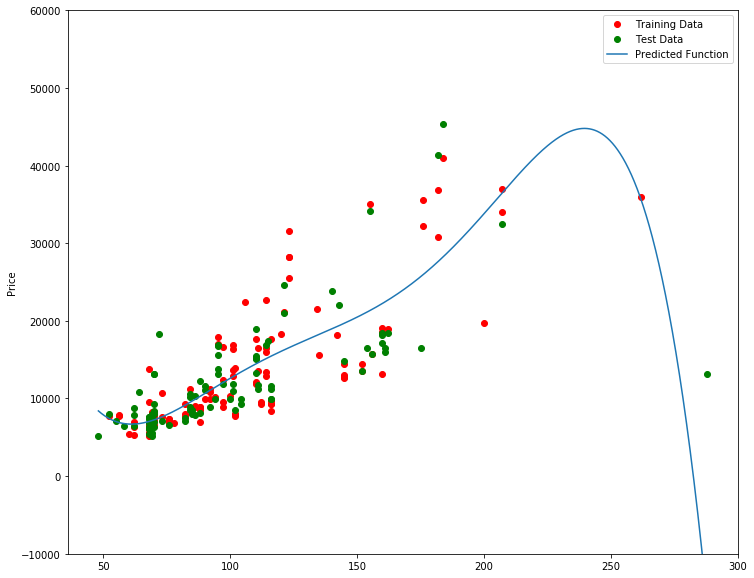

In [49]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. We see that the estimated function appears to track the data

In [50]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [51]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h3>Ridge regression</h3> <br>
Using Ridge Regression we will check how the parameter alpha changes the model. <br>
Let's perform a degree two polynomial transformation on our data.

In [52]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's create a Ridge regression object, setting the regularization parameter to 0.1

In [53]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, we can fit the model using the method fit.

In [54]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\Pushkar Jaywant\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.143870e-17
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Prediction

In [55]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set

In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5581.0880852  19413.85630679 13124.83293099  7882.27787309]
test set : [ 6795. 15750. 15250.  5151.]


Select the value of Alfa that minimizes the test error, for example, we can use a for loop.

In [57]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Plot out the value of R^2 for different Alphas

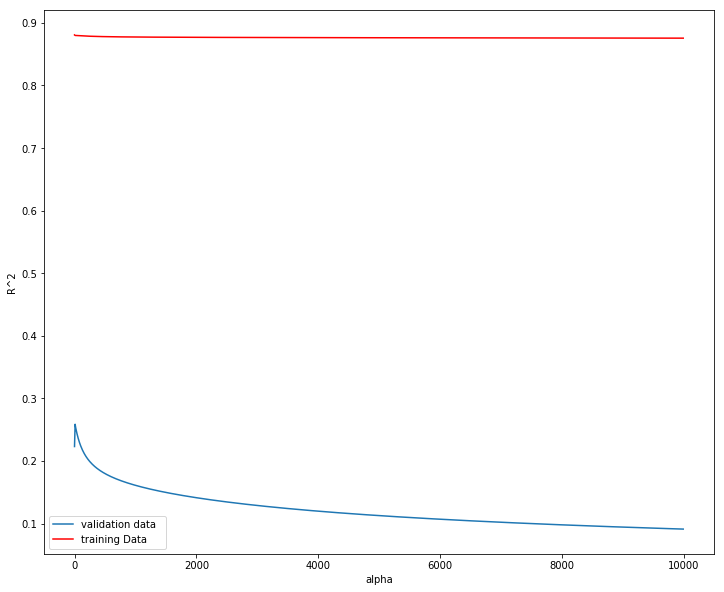

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa.<br>
The red line in figure represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.

<h3>Grid Search</h3> <br>
The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

We create a dictionary of parameter values:

In [59]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [60]:
RR=Ridge()

Create a ridge grid search object

In [61]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model

In [62]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\Pushkar Jaywant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [63]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

We now test the model on the test data

In [64]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.707889774499683